In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10**6

In [3]:
ip = np.random.randint(2, size=N)
ip = ip.astype(int)

In [4]:
s = 2 * ip - 1


In [5]:
eb_no_db = np.arange(0,30)

In [6]:
bit_error_SISO = np.zeros(len(eb_no_db))
bit_error_SC = np.zeros(len(eb_no_db))
bit_error_EGC = np.zeros(len(eb_no_db))
bit_error_MRC = np.zeros(len(eb_no_db))
sim_ber_maximal_2Rx=np.zeros(len(eb_no_db))
sim_ber_2Rx = np.zeros(len(eb_no_db))
bit_error_MISO = np.zeros(len(eb_no_db))
bit_error_MRT = np.zeros(len(eb_no_db))
sim_ber_1Rx = np.zeros(len(eb_no_db))

In [7]:
def SISO():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N):
            
            h = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())  
            
            x = s[ii]
            
            
            
            y =  np.dot(h,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            r = y/h
            
            m = np.real(r > 0).astype(int)
            
            equalize_bits.append(m)
            
            
            
        nErr = np.sum(ip != equalize_bits)
       
        
       
        
        bit_error_SISO[jj] = nErr/ N
        
        
        
    return bit_error_SISO 

In [8]:
def SC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            x = s[ii]
            
            y1 =  np.dot(h11,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            y2 =  np.dot(h21,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            h11_gain = np.abs(h11)
            
            h21_gain = np.abs(h21)
            
            if (h11_gain > h21_gain):
                
                transmitted_channel = h11
                
                received_signal = y1
                
                received_signal = y1/transmitted_channel
                
                received_signal = np.real(received_signal>0).astype(int)
                
                equalize_bits.append(received_signal)
                
            else :
                
                transmitted_channel = h21
                
                received_signal = y2
                
                received_signal = y2/transmitted_channel
                
                received_signal = np.real(received_signal>0).astype(int)
                
                equalize_bits.append(received_signal)
                
        nErr = np.sum(ip != equalize_bits)
        
        bit_error_SC[jj] = nErr/N
        
    return bit_error_SC
                
                
            
            

In [9]:
def EGC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            x = s[ii]
            
            y1 = np.dot(h11, x) + n11 * (10 ** (-eb_no_db[jj] / 20))
            
            
            
            y2 = np.dot(h21, x) + n21 * (10 ** (-eb_no_db[jj] / 20))
            
            
            
            y1_hat = np.divide(y1, np.exp(1j*np.angle(h11)))
            
            y2_hat = np.divide(y2, np.exp(1j*np.angle(h21)))
            
            y = y1_hat + y2_hat
            
            w = np.real(y > 0)
            
            equalize_bits.append(w)
            
        nErr = np.sum(ip != equalize_bits)
        
        bit_error_EGC[jj] = nErr / N

    return bit_error_EGC

    
    

In [10]:
 def MRC():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            H = np.array([[h11], [h21]])
            
            n = np.array([[n11], [n21]])
            
            x = s[ii]
            
            y = np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            hermitian_H = np.conjugate(H)
            
            hermitian_H = np.transpose(hermitian_H)
            
            magnitude_H = np.dot(hermitian_H,H)
            
            
#             magnitude_H = np.linalg.norm(H)
#             magnitude_H = np.abs(H)
            
            x_tilde = np.divide(np.dot(hermitian_H,y),magnitude_H)
            
            x_tilde = np.real(x_tilde>0)
            
            x_tilde = x_tilde[0,0]
            
            equalize_bits.append(x_tilde)
            

            
            
            
        nErr = np.sum(ip != equalize_bits)
        
        bit_error_MRC[jj] = nErr/N
        
    return bit_error_MRC

In [11]:
def maximal_ratio_combining_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        h0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        h1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        r0 = h0 * s + 10 ** (-eb_no_db[jj] / 20) * n0
        
        r1 = h1 * s + 10 ** (-eb_no_db[jj] / 20) * n1
        
        s_tilde = np.conj(h0) * r0 + np.conj(h1) * r1

        # normalization
        
        s_tilde = s_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

        # bpsk demodulation
        
        received_bits_s = np.real(s_tilde) >= 0

        nErr = np.sum(received_bits_s != ip)
        

        sim_ber_maximal_2Rx[jj] = nErr / N
        

    return sim_ber_maximal_2Rx

In [12]:
def alamouti_2Tx_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        total_error = 0
        
        for ii in range(N // 2):
            
            h0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n0 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n3 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            s0 = s[2 * ii]
            
            s1 = s[2 * ii + 1]
            
            r0 = h0 * (1 / np.sqrt(2)) * s0 + h1 * (1 / np.sqrt(2)) * s1 + n0 * 10 ** (-eb_no_db[jj] / 20)
            
            r1 = - h0 * (1 / np.sqrt(2)) * np.conj(s1) + h1 * np.conj(s0) + n1 * 10 ** (-eb_no_db[jj] / 20)
            
            r2 = h2 * (1 / np.sqrt(2)) * s0 + h3 * (1 / np.sqrt(2)) * s1 + n2 * 10 ** (-eb_no_db[jj] / 20)
            
            r3 = -h2 * (1 / np.sqrt(2)) * np.conj(s1) + h3 * (1 / np.sqrt(2)) * np.conj(s0) + n3 * 10 ** (-eb_no_db[jj] / 20)
            
            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1) + np.conj(h2) * r2 + h3 * np.conj(r3)
            
            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1) + np.conj(h3) * r2 - h2 * np.conj(r3)
            
            s0_tilde = s0_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s1_tilde = s1_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            received_bit_s0 = np.real(s0_tilde) >= 0
            
            received_bit_s1 = np.real(s1_tilde) >= 0
            
            nErr1 = np.sum(received_bit_s0 != ip[2 * ii])
            
        
            total_error = total_error + nErr1
            
            nErr2 = np.sum(received_bit_s1 != ip[2 * ii + 1])
            
            total_error = total_error + nErr2
            
        sim_ber_2Rx[jj] = total_error / N
        
    return sim_ber_2Rx


In [13]:
def MISO():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        Es = 1
        
        nTx = 2
        
        equalize_bits = []
        
        array_2x1 = np.ones((2, 1))
        
        P = np.sqrt(np.divide(Es,nTx)) * array_2x1
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            H = np.array([[h11, h21]])
            
            n = np.array([[n11, n21]])
            
            x = s[ii]
            
            y =   np.dot(H, P *x ) + n * (10 ** (-eb_no_db[jj] / 20))
            
            
            W = y/np.dot(H,P)
            
            W = np.real(W > 0).astype(int)
            
            equalize_bits.append(W[0,0])
            
            
            
        nErr = np.sum(ip != equalize_bits)
       
        
       
        
        bit_error_MISO[jj] = nErr/ N
        
        
        
    return bit_error_MISO
    

In [14]:
def MRT():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        Es = 1
        
        equalize_bits = []

        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21]])
            
            H_hermitian = np.conjugate(H)
            
            H_hermitian = np.transpose(H_hermitian)
            
            H_hermitian_magnitude = np.linalg.norm(H_hermitian)
            
            n = np.array([[n11, n21]])
            
            x = s[ii]
            
            P = (np.sqrt(Es)/H_hermitian_magnitude) * H_hermitian
            
            y = np.dot(H, (P * x)) + n * (10 ** (-eb_no_db[jj] / 20))
            
            W = y/np.dot(H, P)
            
            x_tilde = np.real(W > 0)
            
            x_tilde = x_tilde[0, 0]
            
            equalize_bits.append(x_tilde)
            

        nErr = np.sum(ip != equalize_bits)
        
        bit_error_MRT[jj] = nErr/N

    return bit_error_MRT

            
            
            
            
    

In [15]:
def alamouti_2Tx_1Rx () :
    
    for jj in range (len(eb_no_db)):
        
        total_error = 0
        
        for ii in range (N//2):
            
            h0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            h1 = (1/ np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 


            r0 = h0 * (1/np.sqrt(2))*s[2 * ii] + h1 * (1/np.sqrt(2))* s[2 * ii + 1] + n0 * 10 ** (-eb_no_db[jj] / 20)

            r1 = - h0 * (1/np.sqrt(2)) * np.conj(s[2 * ii + 1]) + h1  * (1/np.sqrt(2)) * np.conj(s[2 * ii]) + n1  * 10 ** (-eb_no_db[jj] / 20)

            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1)

            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1)



            s0_tilde = s0_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            s1_tilde = s1_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            received_bits_s0 = np.real(s0_tilde) >= 0

            received_bits_s1 = np.real(s1_tilde) >= 0




            nErr = np.sum(received_bits_s0 != ip[2 * ii] ) 

            total_error = total_error + nErr 



            nErr2 = np.sum(received_bits_s1 != ip[2 * ii + 1]) 

            total_error = total_error + nErr2
            
        sim_ber_1Rx[jj] = total_error / N
    
    return sim_ber_1Rx

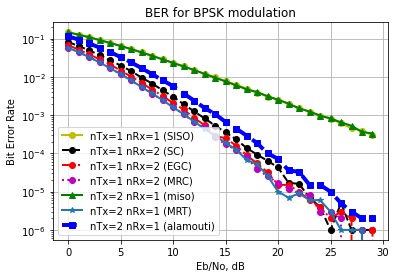

In [16]:
siso = SISO()

sc = SC()

egc = EGC()


mrc = MRC()


miso = MISO()

mrt = MRT()

alamouti_1Rx = alamouti_2Tx_1Rx ()


plt.figure()
plt.semilogy(eb_no_db, siso, 'yo-', linewidth=2, markersize=6, label='nTx=1 nRx=1 (SISO)')
plt.semilogy(eb_no_db, sc, 'ko--', linewidth=2, markersize=6, label='nTx=1 nRx=2 (SC)')
plt.semilogy(eb_no_db, egc, 'ro-.', linewidth=2, markersize=6, label='nTx=1 nRx=2 (EGC)')
plt.semilogy(eb_no_db, mrc, 'mo:', linewidth=2, markersize=6, label='nTx=1 nRx=2 (MRC)')

plt.semilogy(eb_no_db, miso, 'g^-', linewidth=2, markersize=6, label='nTx=2 nRx=1 (miso)')
plt.semilogy(eb_no_db, mrt, '*-', linewidth=2, markersize=6, label='nTx=2 nRx=1 (MRT)')
plt.semilogy(eb_no_db, alamouti_1Rx, 'bs--', linewidth=4, markersize=6, label='nTx=2 nRx=1 (alamouti)')
plt.legend()
plt.grid(True)
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation')
plt.show()